Wrapper (serial)

In [6]:
%%writefile src/sms.sh

#!/bin/bash
LOG_FILE="logs/sms.st"
strace -f -tt -T -r -y -o "$LOG_FILE" "$@"

Overwriting src/sms.sh


In [7]:
!chmod +x src/sms.sh

Usage

In [49]:
%%bash
./src/sms.sh ls

-e
00-prepare-eg.ipynb
01A-devCore-LineReader.ipynb
01B-devCore-Preprocessor.ipynb
01C-devCore-StraceAnalyzer.ipynb
02-dev-View1.ipynb
02-test-view1.ipynb
03-dev-View2.ipynb
03-test-view2.ipynb
04-dev-view3.ipynb
04-test-view3.ipynb
05-sm-wrapper.ipynb
05-test-wrapper.ipynb
06-dev-view4.ipynb
data
logs
old
src


In [50]:
from strace_miner.views.v3 import IOMinerV3
from strace_miner.views.v3 import IOLineReaderV3

io_calls = ['read','write']
line_reader = IOLineReaderV3(['/workspaces/',],collapse=False)
sta = IOMinerV3(["logs/sms.st",],io_calls,line_reader)
sta.preprocess()
sta.prepare_summaries_and_event_log()
sta.prepare_dfg()
sta.activities_summary['sms']

CSV log path: logs/sms.csv


/home/vscode/.local/lib/python3.12/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


,call,duration,percent
0,"[read, [<4KB], /lib/x86_64-linux-gnu]",0.000277,0.810605
1,"[read, [<4KB], /proc/filesystems]",0.000177,0.517968
2,"[read, [<4KB], /usr/lib]",0.000065,0.190214
3,"[read, [<4MB], /etc/locale.alias]",0.000153,0.447735
4,"[write, [<4KB], pipe:[630695]]",0.000060,0.175582


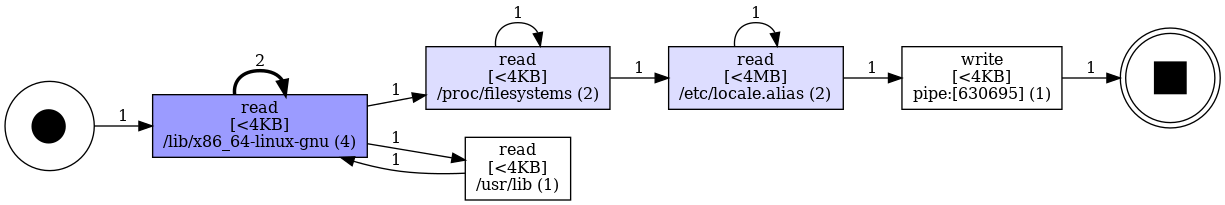

In [51]:
sta.view_dfg()

Wrapper (parallel)

In [41]:
%%writefile src/smp.sh

#!/bin/bash
LOG_FILE="logs/$1_$(hostname)_$$.st"
echo $LOG_FILE
strace -f -tt -T -r -y -o "$LOG_FILE" "$@"

Overwriting src/smp.sh


In [42]:
!chmod +x src/smp.sh

Usage

In [44]:
%%bash
./src/smp.sh lscpu

logs/lscpu_a65243794be3_11295.st
Architecture:                       x86_64
CPU op-mode(s):                     32-bit, 64-bit
Byte Order:                         Little Endian
Address sizes:                      39 bits physical, 48 bits virtual
CPU(s):                             16
On-line CPU(s) list:                0-15
Thread(s) per core:                 2
Core(s) per socket:                 8
Socket(s):                          1
Vendor ID:                          GenuineIntel
CPU family:                         6
Model:                              154
Model name:                         12th Gen Intel(R) Core(TM) i7-1260P
Stepping:                           3
CPU MHz:                            2496.011
BogoMIPS:                           4992.02
Virtualization:                     VT-x
Hypervisor vendor:                  Microsoft
Virtualization type:                full
L1d cache:                          384 KiB
L1i cache:                          256 KiB
L2 cache:        

In [48]:
!mpiexec -n 2 bash src/smp.sh ls

logs/ls_a65243794be3_12899.st
logs/ls_a65243794be3_12900.st
-e				  02-test-view1.ipynb  data
00-prepare-eg.ipynb		  03-dev-View2.ipynb   logs
01A-devCore-LineReader.ipynb	  03-test-view2.ipynb  old
01B-devCore-Preprocessor.ipynb	  04-dev-view3.ipynb   src
01C-devCore-StraceAnalyzer.ipynb  04-test-view3.ipynb
02-dev-View1.ipynb		  05-sm-wrapper.ipynb
-e				  02-test-view1.ipynb  data
00-prepare-eg.ipynb		  03-dev-View2.ipynb   logs
01A-devCore-LineReader.ipynb	  03-test-view2.ipynb  old
01B-devCore-Preprocessor.ipynb	  04-dev-view3.ipynb   src
01C-devCore-StraceAnalyzer.ipynb  04-test-view3.ipynb
02-dev-View1.ipynb		  05-sm-wrapper.ipynb


In [54]:
!strace -tt -y ls

12:03:56.370504 execve("/bin/ls", ["ls"], 0x7ffe850e42c0 /* 59 vars */) = 0
12:03:56.370934 brk(NULL)               = 0x558500f21000
12:03:56.371056 access("/etc/ld.so.preload", R_OK) = -1 ENOENT (No such file or directory)
12:03:56.371171 openat(AT_FDCWD, "/etc/ld.so.cache", O_RDONLY|O_CLOEXEC) = 3</etc/ld.so.cache>
12:03:56.371571 fstat(3</etc/ld.so.cache>, {st_mode=S_IFREG|0644, st_size=39386, ...}) = 0
12:03:56.371709 mmap(NULL, 39386, PROT_READ, MAP_PRIVATE, 3</etc/ld.so.cache>, 0) = 0x7f2e3c087000
12:03:56.371811 close(3</etc/ld.so.cache>) = 0
12:03:56.371904 openat(AT_FDCWD, "/lib/x86_64-linux-gnu/libselinux.so.1", O_RDONLY|O_CLOEXEC) = 3</lib/x86_64-linux-gnu/libselinux.so.1>
12:03:56.371999 read(3</lib/x86_64-linux-gnu/libselinux.so.1>, "\177ELF\2\1\1\0\0\0\0\0\0\0\0\0\3\0>\0\1\0\0\0\220}\0\0\0\0\0\0"..., 832) = 832
12:03:56.372090 fstat(3</lib/x86_64-linux-gnu/libselinux.so.1>, {st_mode=S_IFREG|0644, st_size=166120, ...}) = 0
12:03:56.372180 mmap(NULL, 8192, PROT_READ|PROT_WR